<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Regresión Lineal I

En este notebook intentaremos predecir cuántas veces será compartido en Redes Sociales un artículo de Machine Learning segun algunas de sus características

## Importar las librerías

Antes de empezar vamos a importar las siguientes librerías:

Numpy

*   Numpy
*   Pandas
*   Seaborn
*   Matplotlib


In [1]:
# Importa las librerías a nuestro entorno de trabajo
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Cargar un archivo de datos
Hay varias maneras de cargar un archivo de datos en nuestro entorno. El archivo lo podemos llamar desde una URL o tener guardado en nuestra computadora.

En este caso subiremos subir un primer archivo en forma local (el profesor te facilitirá los archivos) ejecutando lo siguiente:

In [2]:
#cargamos los datos de entrada
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
data = pd.read_csv(name, sep=",")



Saving articulos_ml.csv to articulos_ml.csv


## Análisis Exploratorio

Realicemos un análisis exploratorio de los datos cargados en el data frame.


In [3]:
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [4]:
#son 161 registros con 8 columnas. Veamos los primeros registros para tener una idea
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


## ¿Qué observaciones puedes realizar de los datos?


Podemos ver que en la columna url y # of comments existen nulos, por lo cual habria que hacer un analisis de la cantidad de nulos que tiene cada columna, ademas de que la columna # of comments es de tipo float cuando no lo requiere, por lo se podria modificar esto para que sea mas facil de leer

In [5]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


## ¿Qué observaciones puedes indicar de estas estadísticas?

¿Cuál es la media de la Cantidad de palabras?

¿Cuales son los artículos más pequeños y los más grandes? (en cantidad de palabras)



la media de la cantidad de palabras es 1808, la menor cantidad de palabras es 250, y la maxima de palabras es de 8401, ademas podemos afirmar que no es obligatorio que los libros tengan algun url, comentario o compartidos, pero imagenes por su parte si, ya que estas ayudan a identificar el libro de manera mas rapida en formato fisico.
Por su parte podemos ver que la diferencia entre 75 y max es mucha, por lo cual pueden existir outliers.

## Visualizamos Cantidad de Palabras vs. Compartidos

Para esto graficaremos en dos dimensiones las variables indicadas.

Así, visualizaremos una variable con color naranja y otra con color azul.

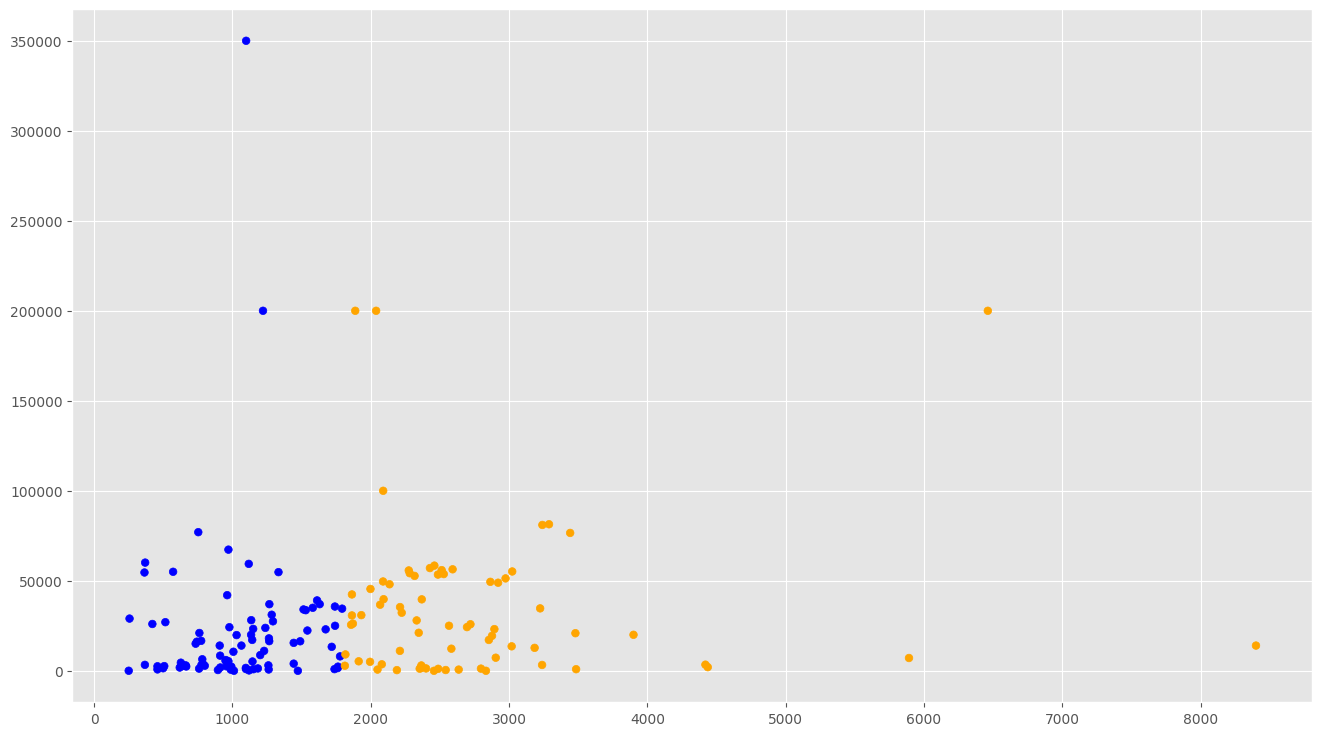

In [6]:
#Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

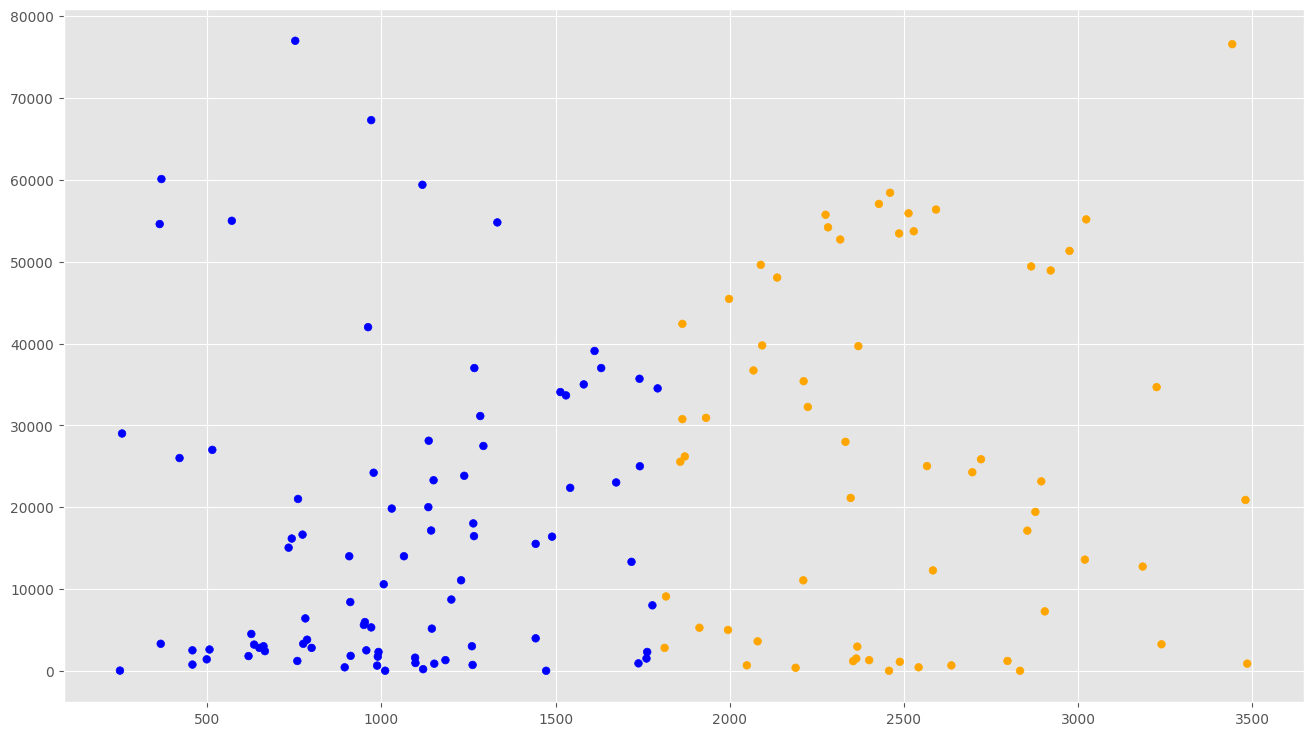

In [7]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [8]:
# Veamos como cambian los valores una vez filtrados
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


Podemos ver que el maximo a reducido, ya que los fuera de rango han sido eliminados, lo que hace que las variables esten mas "limpias" a la hora de usar un modelo

## Regresión Lineal Simple (1 variable)

Vamos a intentar primero una Regresión Lineal con 1 sóla variable

In [9]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [10]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


## Visualizamos la Recta que obtuvimos

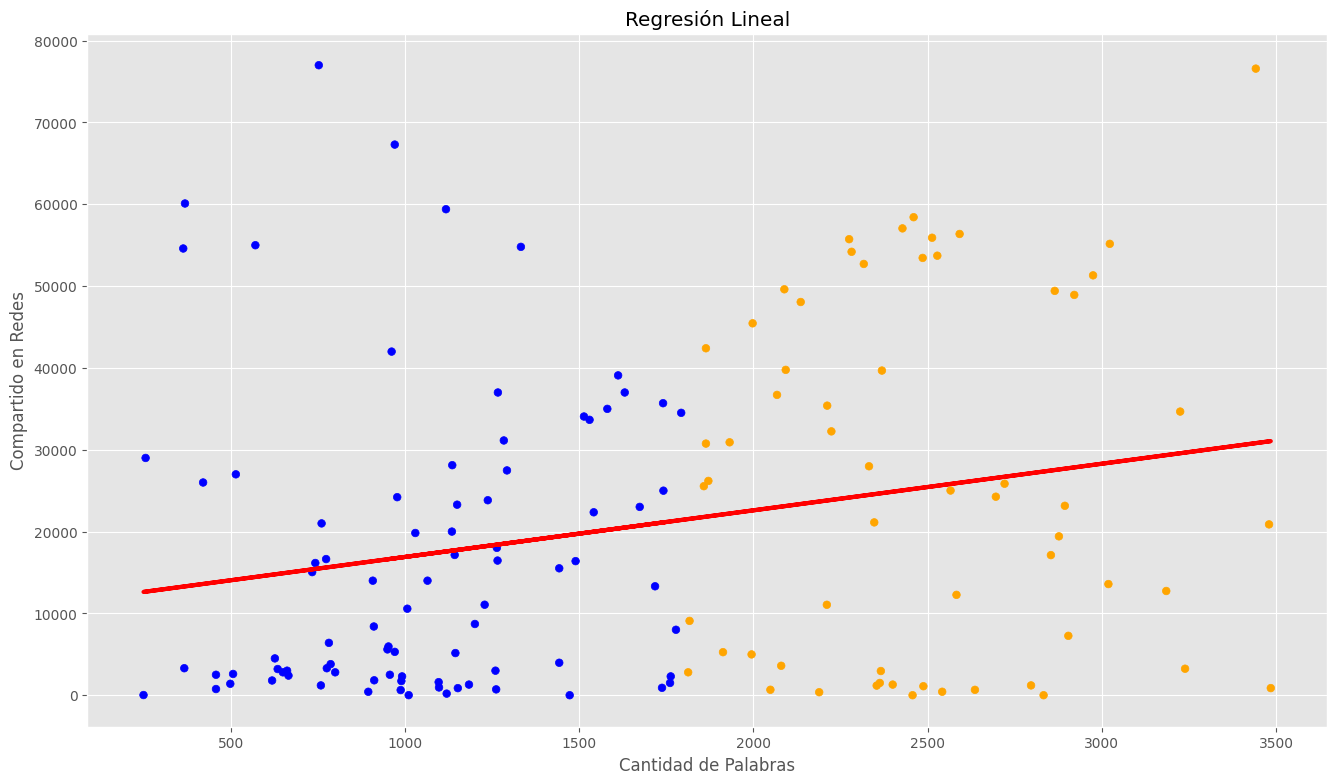

In [11]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

### Predicción 1

In [12]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


Evidentemente No es tan sencillo...

Vamos a mejorar un poco el modelo

# Regresión Lineal Múltiples (múltiples variables)

In [13]:
#Vamos a intentar mejorar el Modelo, con una dimensión más:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

Atención: Esta vez, nuestras dimensiones de entrenamiento serán X e Y y las etiquetas de predicción serán z.

In [14]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


## Esta vez visualizamos un plano

In [32]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

<Figure size 1600x900 with 0 Axes>

### Predicción 2

In [16]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con:
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


## Comparemos las predicciónes obtenidas en los modelos

En este caso, Obtuvimos mejora en el modelo de 2 dimensiones

In [17]:
# Restamos los errores calculados antes:
# Obviamente, "menos error" es mejor
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)

20765911.860715985


In [18]:
# También calculamos la mejora en la varianza:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejoraEnVarianza)
# Aunque no parezca mucho, recordemos que el valor más alto que se puede obtener es 1.0

0.052615337462582956


In [22]:
# Finalmente, mejoramos en nuestra predicción de un artículo de 2.000 palabras,
# pues aunque disminuyen los "Shares" que obtendremos en el 2do modelo,
# seguramente será un valor más cercano a la realidad
diferenciaComparir = z_Dosmil - y_Dosmil
print(int(diferenciaComparir))

-2077


## ¿Qué conclusiones puedes generar de este ejercicio?

¿Qué ocurrió con el segundo modelo?

¿Por qué mejoró la predicción?

Podemos concluir que con la eliminacion de outliers, el modelo pudo tener una mejor respuesta, en el segundo modelo al eliminar los outliers, las predicciones tendieron a dar numeros mas realistas, y podemos ver que la prediccion mejoro al visualizar que los errores son menores que anteriormente, con la mejora de error y la mejora de la varianza, ademas de mostrar la mejora de la varianza, ademas este modelo cuenta con que z_train posee mas variables, y da un analisis mas preciso en comparacion a la prediccion anterior